In [1]:
'''TASK 1'''
from gettext import install
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
df=pd.read_csv(
    'credit cards-2022-post.csv',
)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,5771,180000,1,2,1,38,1,2,2,0,...,5071,5195,0,2000,200,500,124,0,0,1
1,3999,20000,2,1,2,23,2,2,2,2,...,12957,13104,12744,3500,200,1000,500,0,1000,1
2,397,100000,1,1,2,38,0,0,0,0,...,43011,43011,28947,2502,1200,860,0,579,0,0
3,15467,220000,1,1,2,30,2,0,0,0,...,90889,91892,93815,5000,5000,4200,4000,4000,5000,0
4,16482,240000,2,4,1,59,0,0,0,0,...,241075,146440,132290,8357,10001,10000,10000,5000,20000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,20939,280000,1,2,2,39,-2,-2,-2,-2,...,4071,-30,-30,12577,4897,4176,0,0,0,0
23996,4919,260000,2,1,2,39,0,0,0,0,...,95975,62817,61221,30054,20057,5113,3040,20000,30007,0
23997,1437,80000,2,1,2,29,0,0,0,2,...,80422,78284,77270,2842,20412,0,3000,3000,3000,1
23998,1764,500000,1,1,2,33,-1,-1,-1,-2,...,4158,7958,-196,2065,10556,4170,7963,196,7083,0


In [4]:
df.min()

ID                                 1
LIMIT_BAL                      10000
SEX                                1
EDUCATION                          0
MARRIAGE                           0
AGE                               21
PAY_0                             -2
PAY_2                             -2
PAY_3                             -2
PAY_4                             -2
PAY_5                             -2
PAY_6                             -2
BILL_AMT1                    -165580
BILL_AMT2                     -69777
BILL_AMT3                    -157264
BILL_AMT4                    -170000
BILL_AMT5                     -81334
BILL_AMT6                    -209051
PAY_AMT1                           0
PAY_AMT2                           0
PAY_AMT3                           0
PAY_AMT4                           0
PAY_AMT5                           0
PAY_AMT6                           0
default payment next month         0
dtype: int64

In [5]:
df.max()

ID                              30000
LIMIT_BAL                      800000
SEX                                 2
EDUCATION                           6
MARRIAGE                            3
AGE                                75
PAY_0                               8
PAY_2                               8
PAY_3                               8
PAY_4                               8
PAY_5                               8
PAY_6                               8
BILL_AMT1                      746814
BILL_AMT2                      743970
BILL_AMT3                     1664089
BILL_AMT4                      706864
BILL_AMT5                      823540
BILL_AMT6                      699944
PAY_AMT1                       873552
PAY_AMT2                      1684259
PAY_AMT3                       889043
PAY_AMT4                       621000
PAY_AMT5                       426529
PAY_AMT6                       528666
default payment next month          1
dtype: int64

In [6]:
df.range()

AttributeError: 'DataFrame' object has no attribute 'range'

In [ ]:
df.median()

In [ ]:
df.mean()

In [282]:
df.value_counts()

ID     LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month
1      20000      2    2          1         24    2      2     -1     -1     -2     -2      3913       3102      689        0          0          0          0         689       0         0         0         0         1                             1
19967  370000     2    1          1         36   -2     -2     -2     -2     -2     -2      2788       25790     3007       4246       3737       2290       25794     3007      4305      3737      2290      22259     0                             1
19977  210000     2    1          2         32    1     -2     -1     -1     -1     -1     -974       -974       20363      770        0          6138       0         21337     770       0         6138      0         0                             1
19976  22

In [283]:
df.mode()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,50000.0,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23997,29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23998,29999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
df.std()

ID                              8653.399015
LIMIT_BAL                     129609.074302
SEX                                0.489137
EDUCATION                          0.789898
MARRIAGE                           0.521726
AGE                                9.211893
PAY_0                              1.127733
PAY_2                              1.196885
PAY_3                              1.196360
PAY_4                              1.167250
PAY_5                              1.131697
PAY_6                              1.149977
BILL_AMT1                      72964.598363
BILL_AMT2                      70911.001131
BILL_AMT3                      69518.727686
BILL_AMT4                      64045.332972
BILL_AMT5                      60414.130512
BILL_AMT6                      59237.618064
PAY_AMT1                       16840.629423
PAY_AMT2                       24442.456139
PAY_AMT3                       17138.698559
PAY_AMT4                       15916.894010
PAY_AMT5                       1

In [285]:
df.var()

ID                            7.488131e+07
LIMIT_BAL                     1.679851e+10
SEX                           2.392546e-01
EDUCATION                     6.239395e-01
MARRIAGE                      2.721985e-01
AGE                           8.485897e+01
PAY_0                         1.271781e+00
PAY_2                         1.432533e+00
PAY_3                         1.431276e+00
PAY_4                         1.362473e+00
PAY_5                         1.280739e+00
PAY_6                         1.322447e+00
BILL_AMT1                     5.323833e+09
BILL_AMT2                     5.028370e+09
BILL_AMT3                     4.832853e+09
BILL_AMT4                     4.101805e+09
BILL_AMT5                     3.649867e+09
BILL_AMT6                     3.509095e+09
PAY_AMT1                      2.836068e+08
PAY_AMT2                      5.974337e+08
PAY_AMT3                      2.937350e+08
PAY_AMT4                      2.533475e+08
PAY_AMT5                      2.437652e+08
PAY_AMT6   

In [286]:
q1=df['ID'].quantile(0.25)
q3=df['ID'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['ID']<lower_lim)
upper_out=(df['ID']>upper_lim)

df['ID'][(lower_out|upper_out)]

Series([], Name: ID, dtype: int64)

In [287]:
q1=df['LIMIT_BAL'].quantile(0.25)
q3=df['LIMIT_BAL'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['LIMIT_BAL']<lower_lim)
upper_out=(df['LIMIT_BAL']>upper_lim)

df['LIMIT_BAL'][(lower_out|upper_out)]

98       590000
484      660000
513      670000
865      610000
1208     710000
          ...  
22448    640000
22468    610000
22501    620000
22589    710000
23898    550000
Name: LIMIT_BAL, Length: 128, dtype: int64

In [288]:
q1=df['SEX'].quantile(0.25)
q3=df['SEX'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['SEX']<lower_lim)
upper_out=(df['SEX']>upper_lim)

df['SEX'][(lower_out|upper_out)]

Series([], Name: SEX, dtype: int64)

In [289]:
q1=df['EDUCATION'].quantile(0.25)
q3=df['EDUCATION'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['EDUCATION']<lower_lim)
upper_out=(df['EDUCATION']>upper_lim)

df['EDUCATION'][(lower_out|upper_out)]

4        4
30       6
161      5
167      4
180      5
        ..
23652    4
23684    4
23756    5
23822    5
23898    5
Name: EDUCATION, Length: 363, dtype: int64

In [290]:
q1=df['MARRIAGE'].quantile(0.25)
q3=df['MARRIAGE'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['MARRIAGE']<lower_lim)
upper_out=(df['MARRIAGE']>upper_lim)

df['MARRIAGE'][(lower_out|upper_out)]

Series([], Name: MARRIAGE, dtype: int64)

In [291]:
q1=df['AGE'].quantile(0.25)
q3=df['AGE'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['AGE']<lower_lim)
upper_out=(df['AGE']>upper_lim)

df['AGE'][(lower_out|upper_out)]

31       61
86       61
98       63
145      62
395      62
         ..
23282    66
23380    68
23381    65
23704    69
23757    62
Name: AGE, Length: 224, dtype: int64

In [292]:
q1=df['PAY_0'].quantile(0.25)
q3=df['PAY_0'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_0']<lower_lim)
upper_out=(df['PAY_0']>upper_lim)

df['PAY_0'][(lower_out|upper_out)]

1        2
3        2
17       2
26       2
37       2
        ..
23958    2
23975    2
23977    2
23982    3
23991    3
Name: PAY_0, Length: 2516, dtype: int64

In [293]:
q1=df['PAY_2'].quantile(0.25)
q3=df['PAY_2'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_2']<lower_lim)
upper_out=(df['PAY_2']>upper_lim)

df['PAY_2'][(lower_out|upper_out)]

0        2
1        2
13       2
16       2
18       2
        ..
23977    2
23982    2
23983    2
23984    2
23991    2
Name: PAY_2, Length: 3515, dtype: int64

In [294]:
q1=df['PAY_3'].quantile(0.25)
q3=df['PAY_3'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_3']<lower_lim)
upper_out=(df['PAY_3']>upper_lim)

df['PAY_3'][(lower_out|upper_out)]

0        2
1        2
23       2
26       2
29       2
        ..
23982    3
23983    2
23984    2
23989    2
23991    2
Name: PAY_3, Length: 3381, dtype: int64

In [295]:
q1=df['PAY_4'].quantile(0.25)
q3=df['PAY_4'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_4']<lower_lim)
upper_out=(df['PAY_4']>upper_lim)

df['PAY_4'][(lower_out|upper_out)]

1        2
23       2
26       2
31       2
54       2
        ..
23982    2
23983    2
23984    2
23997    2
23999    2
Name: PAY_4, Length: 2810, dtype: int64

In [296]:
q1=df['PAY_5'].quantile(0.25)
q3=df['PAY_5'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_5']<lower_lim)
upper_out=(df['PAY_5']>upper_lim)

df['PAY_5'][(lower_out|upper_out)]

1        2
26       2
31       2
38       2
78       2
        ..
23981    2
23982    2
23983    2
23984    2
23999    2
Name: PAY_5, Length: 2376, dtype: int64

In [297]:
q1=df['PAY_6'].quantile(0.25)
q3=df['PAY_6'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_6']<lower_lim)
upper_out=(df['PAY_6']>upper_lim)

df['PAY_6'][(lower_out|upper_out)]

1        2
11       2
17       2
26       2
29       2
        ..
23981    2
23982    2
23983    2
23984    2
23999    2
Name: PAY_6, Length: 2481, dtype: int64

In [298]:
q1=df['BILL_AMT1'].quantile(0.25)
q3=df['BILL_AMT1'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['BILL_AMT1']<lower_lim)
upper_out=(df['BILL_AMT1']>upper_lim)

df['BILL_AMT1'][(lower_out|upper_out)]

4        233918
56       212601
83       260991
86       353176
91       170440
          ...  
23971    184050
23972    206714
23974    177961
23979    191953
23990    274731
Name: BILL_AMT1, Length: 1895, dtype: int64

In [299]:
q1=df['BILL_AMT2'].quantile(0.25)
q3=df['BILL_AMT2'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['BILL_AMT2']<lower_lim)
upper_out=(df['BILL_AMT2']>upper_lim)

df['BILL_AMT2'][(lower_out|upper_out)]

4        235404
39       160437
56       177946
62       367979
83       214726
          ...  
23971    171714
23972    197252
23979    189147
23990    281713
23999    162377
Name: BILL_AMT2, Length: 1917, dtype: int64

In [300]:
q1=df['BILL_AMT3'].quantile(0.25)
q3=df['BILL_AMT3'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['BILL_AMT3']<lower_lim)
upper_out=(df['BILL_AMT3']>upper_lim)

df['BILL_AMT3'][(lower_out|upper_out)]

4        236564
62       294969
80       177741
83       230250
86       303494
          ...  
23968    154653
23971    154940
23979    191673
23990    242063
23999    174501
Name: BILL_AMT3, Length: 1976, dtype: int64

In [301]:
q1=df['BILL_AMT4'].quantile(0.25)
q3=df['BILL_AMT4'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['BILL_AMT4']<lower_lim)
upper_out=(df['BILL_AMT4']>upper_lim)

df['BILL_AMT4'][(lower_out|upper_out)]

4        241075
62       189612
80       163299
83       188805
86       260113
          ...  
23925    156977
23968    450497
23971    136894
23979    192051
23999    155355
Name: BILL_AMT4, Length: 2095, dtype: int64

In [302]:
q1=df['BILL_AMT5'].quantile(0.25)
q3=df['BILL_AMT5'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['BILL_AMT5']<lower_lim)
upper_out=(df['BILL_AMT5']>upper_lim)

df['BILL_AMT5'][(lower_out|upper_out)]

4        146440
62       128459
80       159110
83       192229
86       263229
          ...  
23956    181304
23968    425957
23971    138467
23979    193348
23999    129942
Name: BILL_AMT5, Length: 2190, dtype: int64

In [303]:
q1=df['BILL_AMT6'].quantile(0.25)
q3=df['BILL_AMT6'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr
lower_out=(df['BILL_AMT6']<lower_lim)
upper_out=(df['BILL_AMT6']>upper_lim)

df['BILL_AMT6'][(lower_out|upper_out)]

4        132290
62       167105
80       135658
86       268446
91       122952
          ...  
23956    219929
23968    298509
23971    128473
23979    193337
23994    125279
Name: BILL_AMT6, Length: 2179, dtype: int64

In [304]:
q1=df['PAY_AMT1'].quantile(0.25)
q3=df['PAY_AMT1'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_AMT1']<lower_lim)
upper_out=(df['PAY_AMT1']>upper_lim)

df['PAY_AMT1'][(lower_out|upper_out)]

42        50000
62       368199
64        17328
70        20460
86        13869
          ...  
23950     20000
23956     20078
23968     15785
23995     12577
23996     30054
Name: PAY_AMT1, Length: 2180, dtype: int64

In [305]:
q1=df['PAY_AMT2'].quantile(0.25)
q3=df['PAY_AMT2'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_AMT2']<lower_lim)
upper_out=(df['PAY_AMT2']>upper_lim)

df['PAY_AMT2'][(lower_out|upper_out)]

27        13519
28        13003
38        20000
73        15362
80       177080
          ...  
23986     11950
23990    145000
23996     20057
23997     20412
23999     15000
Name: PAY_AMT2, Length: 2173, dtype: int64

In [306]:
q1=df['PAY_AMT3'].quantile(0.25)
q3=df['PAY_AMT3'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_AMT3']<lower_lim)
upper_out=(df['PAY_AMT3']>upper_lim)

df['PAY_AMT3'][(lower_out|upper_out)]

7        102680
27        43251
28        15000
36        67867
45        57113
          ...  
23932     18249
23935     40682
23956     30000
23968    338394
23990     26000
Name: PAY_AMT3, Length: 2067, dtype: int64

In [307]:
q1=df['PAY_AMT4'].quantile(0.25)
q3=df['PAY_AMT4'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_AMT4']<lower_lim)
upper_out=(df['PAY_AMT4']>upper_lim)

df['PAY_AMT4'][(lower_out|upper_out)]

4        10000
5        67296
22       18738
23       63965
28       11000
         ...  
23965    15000
23968    16000
23986    18567
23989    11977
23999    10000
Name: PAY_AMT4, Length: 2383, dtype: int64

In [308]:
q1=df['PAY_AMT5'].quantile(0.25)
q3=df['PAY_AMT5'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_AMT5']<lower_lim)
upper_out=(df['PAY_AMT5']>upper_lim)

df['PAY_AMT5'][(lower_out|upper_out)]

21        26983
28        10000
39        10000
50        10000
62       167116
          ...  
23960     18178
23973     15000
23989     29127
23990    101005
23996     20000
Name: PAY_AMT5, Length: 2325, dtype: int64

In [309]:
q1=df['PAY_AMT6'].quantile(0.25)
q3=df['PAY_AMT6'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['PAY_AMT6']<lower_lim)
upper_out=(df['PAY_AMT6']>upper_lim)

df['PAY_AMT6'][(lower_out|upper_out)]

4        20000
27       10649
39       12000
50       50000
58       10381
         ...  
23973    10000
23985    10000
23989    16600
23996    30007
23999    11000
Name: PAY_AMT6, Length: 2379, dtype: int64

In [377]:
q1=df['default payment next month'].quantile(0.25)
q3=df['default payment next month'].quantile(0.75)
iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

lower_out=(df['default payment next month']<lower_lim)
upper_out=(df['default payment next month']>upper_lim)

df['default payment next month'][(lower_out|upper_out)]

0        1
1        1
11       1
15       1
18       1
        ..
23989    1
23991    1
23993    1
23997    1
23999    1
Name: default payment next month, Length: 5354, dtype: int64

In [310]:
df.rank()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,4604.0,14499.0,4756.0,14053.0,5520.0,15488.5,20024.0,22053.0,22159.5,14606.5,...,7381.0,7886.5,2164.0,10958.5,4717.5,6421.5,5522.5,2688.0,2862.5,21323.5
1,3186.0,1188.5,16756.0,4221.5,17371.5,874.5,22554.0,22053.0,22159.5,22459.0,...,10043.5,10573.0,10931.0,15446.0,4717.5,8247.5,7150.5,2688.0,9896.0,21323.5
2,317.0,9597.5,4756.0,4221.5,17371.5,15488.5,12676.0,14178.0,14322.0,14606.5,...,16467.0,16991.5,15262.0,13027.0,7369.5,7523.0,2567.5,7532.0,2862.5,9323.5
3,12394.0,17085.0,4756.0,4221.5,17371.5,8224.5,22554.0,14178.0,14322.0,14606.5,...,20367.0,20681.0,20860.0,17701.0,17923.5,17732.0,17828.5,17768.5,19094.0,9323.5
4,13201.0,18110.5,16756.0,23689.0,5520.0,23691.0,12676.0,14178.0,14322.0,14606.5,...,23506.0,22475.0,22158.0,20614.5,21408.5,21588.5,21808.0,19011.0,22942.5,9323.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,16774.0,19455.5,4756.0,14053.0,17371.5,16245.0,1106.0,1511.5,1618.0,1726.0,...,7018.5,359.0,392.0,22107.0,17560.5,17700.0,2567.5,2688.0,2862.5,9323.5
23996,3924.0,18863.5,16756.0,4221.5,17371.5,16245.0,12676.0,14178.0,14322.0,14606.5,...,20604.0,19022.0,19084.0,23360.0,22940.0,19103.5,16634.0,23028.0,23320.0,9323.5
23997,1159.0,8004.5,16756.0,4221.5,17371.5,7023.0,12676.0,14178.0,14322.0,22459.0,...,19830.0,19993.5,19994.0,13568.5,22981.0,2413.5,16158.0,16075.0,16123.0,21323.5
23998,1430.0,23546.5,4756.0,4221.5,17371.5,11145.0,4500.0,5459.0,5632.0,1726.0,...,7048.0,8818.5,290.0,11803.0,21645.0,17693.5,21113.0,5877.5,20854.0,9323.5


Text(0.5, 1.0, 'ID Distribution')

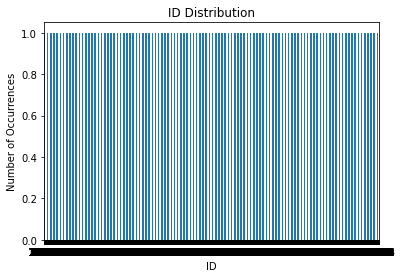

In [311]:
val_counts=df['ID'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("ID")
graph.set_ylabel("Number of Occurrences")
graph.set_title("ID Distribution")

Text(0.5, 1.0, 'LIMIT_BAL Distribution')

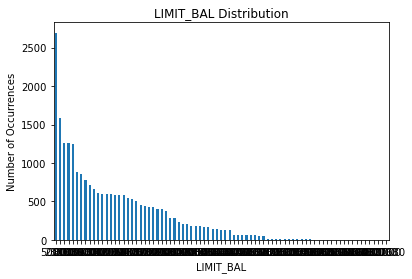

In [312]:
val_counts=df['LIMIT_BAL'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("LIMIT_BAL")
graph.set_ylabel("Number of Occurrences")
graph.set_title("LIMIT_BAL Distribution")

Text(0.5, 1.0, 'SEX Distribution')

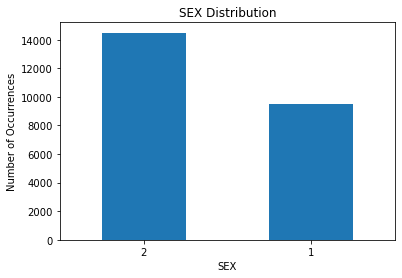

In [313]:
val_counts=df['SEX'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("SEX")
graph.set_ylabel("Number of Occurrences")
graph.set_title("SEX Distribution")

Text(0.5, 1.0, 'EDUCATION Distribution')

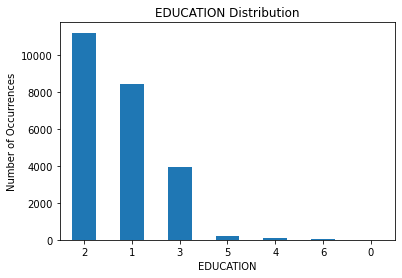

In [314]:
val_counts=df['EDUCATION'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("EDUCATION")
graph.set_ylabel("Number of Occurrences")
graph.set_title("EDUCATION Distribution")

Text(0.5, 1.0, 'MARRIAGE Distribution')

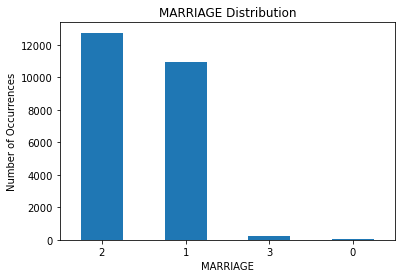

In [315]:
val_counts=df['MARRIAGE'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("MARRIAGE")
graph.set_ylabel("Number of Occurrences")
graph.set_title("MARRIAGE Distribution")

Text(0.5, 1.0, 'AGE Distribution')

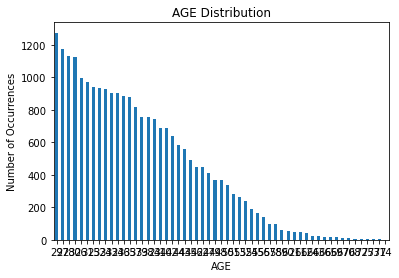

In [316]:
val_counts=df['AGE'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("AGE")
graph.set_ylabel("Number of Occurrences")
graph.set_title("AGE Distribution")

Text(0.5, 1.0, 'PAY_0 Distribution')

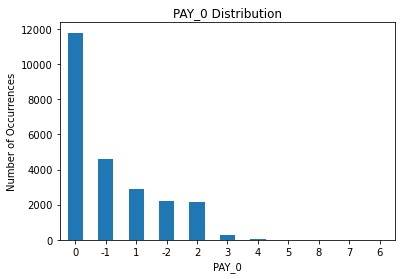

In [317]:
val_counts=df['PAY_0'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_0")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_0 Distribution")

Text(0.5, 1.0, 'PAY_2 Distribution')

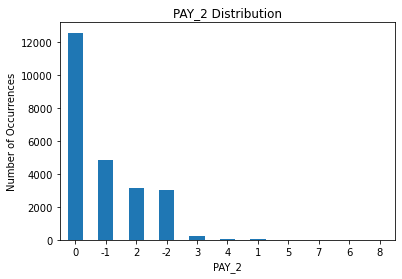

In [318]:
val_counts=df['PAY_2'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_2")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_2 Distribution")

Text(0.5, 1.0, 'PAY_3 Distribution')

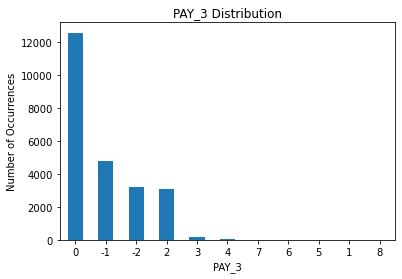

In [319]:
val_counts=df['PAY_3'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_3")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_3 Distribution")

Text(0.5, 1.0, 'PAY_4 Distribution')

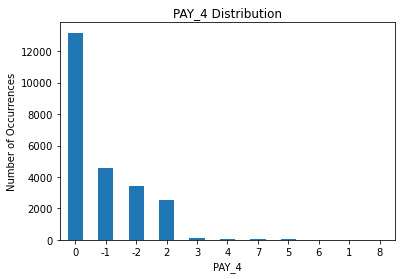

In [320]:
val_counts=df['PAY_4'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_4")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_4 Distribution")

Text(0.5, 1.0, 'PAY_5 Distribution')

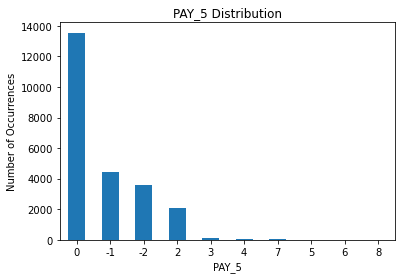

In [321]:
val_counts=df['PAY_5'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_5")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_5 Distribution")

Text(0.5, 1.0, 'PAY_6 Distribution')

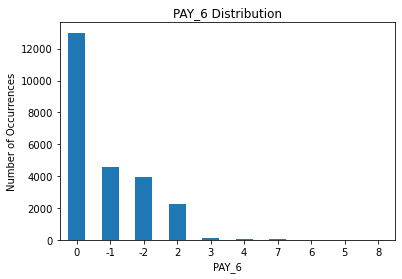

In [322]:
val_counts=df['PAY_6'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_6")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_6 Distribution")

Text(0.5, 1.0, 'PAY_AMT1 Distribution')

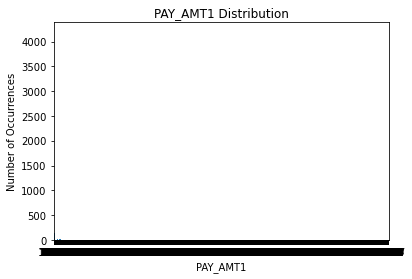

In [323]:
val_counts=df['PAY_AMT1'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_AMT1")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_AMT1 Distribution")

Text(0.5, 1.0, 'PAY_AMT2 Distribution')

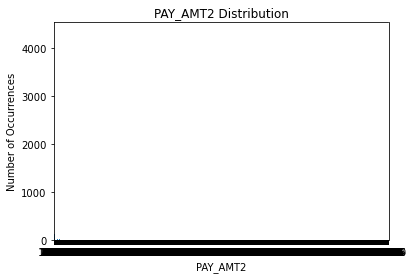

In [324]:
val_counts=df['PAY_AMT2'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_AMT2")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_AMT2 Distribution")

Text(0.5, 1.0, 'PAY_AMT3 Distribution')

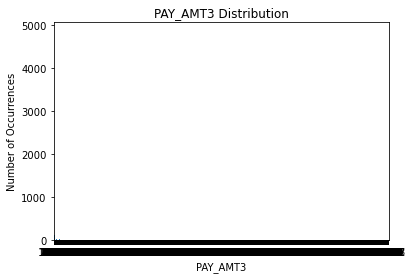

In [325]:
val_counts=df['PAY_AMT3'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_AMT3")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_AMT3 Distribution")

Text(0.5, 1.0, 'PAY_AMT4 Distribution')

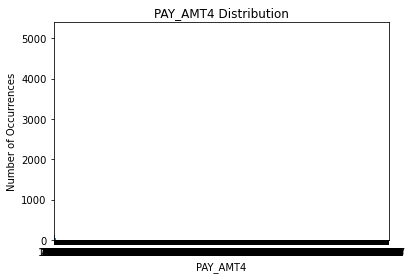

In [326]:
val_counts=df['PAY_AMT4'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_AMT4")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_AMT4 Distribution")

Text(0.5, 1.0, 'PAY_AMT5 Distribution')

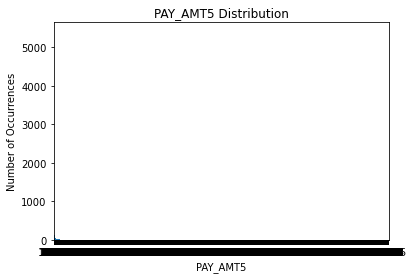

In [327]:
val_counts=df['PAY_AMT5'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_AMT5")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_AMT5 Distribution")

In [ ]:
val_counts=df['PAY_AMT6'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("PAY_AMT6")
graph.set_ylabel("Number of Occurrences")
graph.set_title("PAY_AMT6 Distribution")

In [ ]:
val_counts=df['BILL_AMT1'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("BILL_AMT1")
graph.set_ylabel("Number of Occurrences")
graph.set_title("BILL_AMT1 Distribution")

In [ ]:
val_counts=df['BILL_AMT2'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("BILL_AMT2")
graph.set_ylabel("Number of Occurrences")
graph.set_title("BILL_AMT2 Distribution")

In [ ]:
val_counts=df['BILL_AMT3'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("BILL_AMT3")
graph.set_ylabel("Number of Occurrences")
graph.set_title("BILL_AMT3 Distribution")

In [ ]:
val_counts=df['BILL_AMT4'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("BILL_AMT4")
graph.set_ylabel("Number of Occurrences")
graph.set_title("BILL_AMT4 Distribution")

In [ ]:
val_counts=df['BILL_AMT5'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("BILL_AMT5")
graph.set_ylabel("Number of Occurrences")
graph.set_title("BILL_AMT5 Distribution")

In [ ]:
val_counts=df['BILL_AMT6'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("BILL_AMT6")
graph.set_ylabel("Number of Occurrences")
graph.set_title("BILL_AMT6 Distribution")

Text(0.5, 1.0, 'default payment next month Distribution')

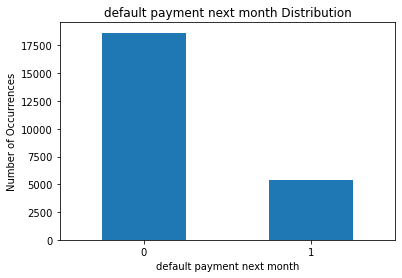

In [376]:
val_counts=df['default payment next month'].value_counts()
graph=val_counts.plot(kind='bar')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
graph.set_xlabel("default payment next month")
graph.set_ylabel("Number of Occurrences")
graph.set_title("default payment next month Distribution")

In [ ]:
df['BILL_AMT1'].min()

In [ ]:
df['BILL_AMT1'].max()

In [ ]:
df['BILL_AMT1'].value_counts()

In [ ]:
df['BILL_AMT1'].mean()

In [ ]:
df['BILL_AMT1'].std()

In [ ]:
var_x=np.array(df['BILL_AMT1'])
plt.boxplot(var_x)

In [ ]:
df['BILL_AMT2'].min()

In [ ]:
df['BILL_AMT2'].max()

In [ ]:
df['BILL_AMT2'].value_counts()

In [ ]:
df['BILL_AMT2'].mean()

In [ ]:
df['BILL_AMT2'].std()

In [ ]:
var_x=np.array(df['BILL_AMT2'])
plt.boxplot(var_x)

In [ ]:
df['BILL_AMT3'].min()

In [ ]:
df['BILL_AMT3'].max()

In [ ]:
df['BILL_AMT3'].value_counts()

In [ ]:
df['BILL_AMT3'].mean()

In [ ]:
df['BILL_AMT3'].std()

In [ ]:
var_x=np.array(df['BILL_AMT3'])
plt.boxplot(var_x)

In [ ]:
df['BILL_AMT4'].min()

In [ ]:
df['BILL_AMT4'].max()

In [ ]:
df['BILL_AMT4'].value_counts()

In [ ]:
df['BILL_AMT4'].mean()

In [ ]:
df['BILL_AMT4'].std()

In [ ]:
var_x=np.array(df['BILL_AMT4'])
plt.boxplot(var_x)

In [ ]:
df['BILL_AMT5'].min()

In [ ]:
df['BILL_AMT5'].max()

In [ ]:
df['BILL_AMT5'].value_counts()

In [ ]:
df['BILL_AMT5'].mean()

In [ ]:
df['BILL_AMT5'].std()

In [ ]:
var_x=np.array(df['BILL_AMT5'])
plt.boxplot(var_x)

In [ ]:
df['BILL_AMT6'].min()

In [ ]:
df['BILL_AMT6'].max()

In [ ]:
df['BILL_AMT6'].value_counts()

In [ ]:
df['BILL_AMT6'].mean()

In [ ]:
df['BILL_AMT6'].std()

In [ ]:
var_x=np.array(df['BILL_AMT6'])
plt.boxplot(var_x)

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box', title='BILL_AMT Boxplots')

# Display the plot
plt.xlabel("ID")
plt.ylabel("Frequency")
plt.title("ID Distribution")
plt.show()

In [369]:
"""TASK 2"""
#Describe your findings observed from the above questions (i.e., 2(a) and 2(b)).    
"""All of the histograms have a very similar interquartile range and are nearly identical with
a slight difference in the data sampling it seems. However, where they difffer is that BILL_AMT6
is weighted downward with a small cluster of points and BILL_AMT 3,5 both contain upper outliers
that we might want to further examine for commonalities"""

'All of the histograms have a very similar interquartile range and are nearly identical with\na slight difference in the data sampling it seems. However, where they difffer is that BILL_AMT6\nis weighted downward with a small cluster of points and BILL_AMT 3,5 both contain upper outliers\nthat we might want to further examine for commonalities'

In [79]:
"""TASK 3"""
#Discuss the characteristics and differences of chi-square functions 


'''Chi-Squared Test: if they select a defined range of attribute values, they are more likely to select another range of values of another mutually dependent attribute. Can be used to detect mutual Independence depending on chi-squared test score. 

Mutual information detects whether some rows contain mutual attribute values across separate attributes.

Chi-Squared is based on lower P values
Mutual information is based on higher mutual info values, more in commo
'''

'TASK 3'

In [370]:
#Can we directly apply a chi-square function and a mutual information function on this dataset for feature selection? 
#Please explain in accordance with the different attribute types in this dataset.  

'''No, we might need to normalize some of the categorical data or categorize the numerical data to compare with the categorical data and vice versa. Otherwise the numerical data can be directly compared utilizing both of the chi-squared and mutual information tests'''

'No, we might need to normalize some of the categorical data or categorize the numerical data to compare with the categorical data and vice versa. Otherwise the numerical data can be directly compared utilizing both of the chi-squared and mutual information tests'

In [410]:
#Employ chi-square or mutual information as appropriate to obtain a measure between values of each feature and the class. 
#Rank features by their measures of chi-square and mutual information, respectively.  
#Note: Please make two lists: one for chi-square and the other for mutual information. 
#An attribute only belongs to one list. 


mutual_info_score(df['ID'],df['default payment next month'])

#ID < Bill_amt1<bill_amt6<pay_amt1<pay_amt6

0.5307828240549662

In [409]:
contingency= pd.crosstab(df['ID'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.49696513636361594

In [381]:
mutual_info_score(df['LIMIT_BAL'],df['default payment next month'])

0.01721881690939895

In [411]:
contingency= pd.crosstab(df['LIMIT_BAL'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

4.480442785191215e-125

In [382]:
mutual_info_score(df['SEX'],df['default payment next month'])

0.0006318352730546595

In [412]:
contingency= pd.crosstab(df['SEX'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

3.6307816914492925e-08

In [383]:
mutual_info_score(df['EDUCATION'],df['default payment next month'])

0.0029522171388151434

In [413]:
contingency= pd.crosstab(df['EDUCATION'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

7.504585848042359e-25

In [384]:
mutual_info_score(df['MARRIAGE'],df['default payment next month'])

0.0005029872206222894

In [414]:
contingency= pd.crosstab(df['MARRIAGE'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

3.374736832509036e-05

In [385]:
mutual_info_score(df['AGE'],df['default payment next month'])

0.00267090467710086

In [415]:
contingency= pd.crosstab(df['AGE'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

#AGE....

1.754297463645798e-08

In [386]:
mutual_info_score(df['PAY_0'],df['default payment next month'])

0.07639297666286696

In [417]:
contingency= pd.crosstab(df['PAY_0'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

#CHI^2

0.0

In [387]:
mutual_info_score(df['PAY_2'],df['default payment next month'])

0.04975875044384179

In [418]:
contingency= pd.crosstab(df['PAY_2'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

#PAY_X CHIS

0.0

In [388]:
mutual_info_score(df['PAY_3'],df['default payment next month'])

0.036895226687647824

In [419]:
contingency= pd.crosstab(df['PAY_3'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.0

In [389]:
mutual_info_score(df['PAY_4'],df['default payment next month'])

0.032940654985826726

In [420]:
contingency= pd.crosstab(df['PAY_4'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.0

In [390]:
mutual_info_score(df['PAY_5'],df['default payment next month'])

0.03200950448758364

In [421]:
contingency= pd.crosstab(df['PAY_5'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.0

In [391]:
mutual_info_score(df['PAY_6'],df['default payment next month'])

0.027065812298487046

In [423]:
contingency= pd.crosstab(df['PAY_6'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.0

In [392]:
mutual_info_score(df['BILL_AMT1'],df['default payment next month'])
#Bill _ amts, earlier the better

0.415370843637736

In [422]:
contingency= pd.crosstab(df['BILL_AMT1'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

#BILL AMT CHI2

0.8660452338340344

In [393]:
mutual_info_score(df['BILL_AMT2'],df['default payment next month'])

0.4101493884767311

In [424]:
contingency= pd.crosstab(df['BILL_AMT2'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.6491404243273402

In [425]:
mutual_info_score(df['BILL_AMT3'],df['default payment next month'])

0.4040469496591991

In [426]:
contingency= pd.crosstab(df['BILL_AMT3'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.7265949979939756

In [395]:
mutual_info_score(df['BILL_AMT4'],df['default payment next month'])

0.3966409715598998

In [379]:
contingency= pd.crosstab(df['BILL_AMT4'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.01721881690939895

In [396]:
mutual_info_score(df['BILL_AMT5'],df['default payment next month'])

0.3876579534522836

In [427]:
contingency= pd.crosstab(df['BILL_AMT5'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.6906076554848462

In [397]:
mutual_info_score(df['BILL_AMT6'],df['default payment next month'])

0.3815607948179738

In [428]:
contingency= pd.crosstab(df['BILL_AMT6'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.4890532471696181

In [398]:
mutual_info_score(df['PAY_AMT1'],df['default payment next month'])

# pay amounts, the earlier the better

0.1522465673824506

In [429]:
contingency= pd.crosstab(df['PAY_AMT1'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.9999999998806247

In [399]:
mutual_info_score(df['PAY_AMT2'],df['default payment next month'])

0.1453710376022176

In [430]:
contingency= pd.crosstab(df['PAY_AMT2'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

1.0

In [400]:
mutual_info_score(df['PAY_AMT3'],df['default payment next month'])

0.14138556608106337

In [431]:
contingency= pd.crosstab(df['PAY_AMT3'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.9999999999969125

In [401]:
mutual_info_score(df['PAY_AMT4'],df['default payment next month'])

0.1302895804553946

In [432]:
contingency= pd.crosstab(df['PAY_AMT4'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.9999999999991136

In [402]:
mutual_info_score(df['PAY_AMT5'],df['default payment next month'])

0.13093101279198127

In [379]:
contingency= pd.crosstab(df['PAY_AMT5'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.01721881690939895

In [403]:
mutual_info_score(df['PAY_AMT6'],df['default payment next month'])

0.13052446209320992

In [379]:
contingency= pd.crosstab(df['PAY_AMT6'], df['default payment next month'])
chi, p, dof, expected=chi2_contingency(contingency)
p

0.01721881690939895

Text(0.5, 1.0, 'ID Distribution in Credit Cards Clients')

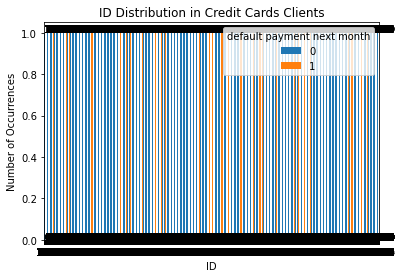

In [466]:
#plot value distribution of the highest ranked three categorical features, 
crosstb=pd.crosstab(df['ID'], df['default payment next month'])
barplot = crosstb.plot(kind='bar', stacked=True, rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("ID")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("ID Distribution in Credit Cards Clients")


Text(0.5, 1.0, 'LIMIT_BAL Distribution in Credit Cards Clients')

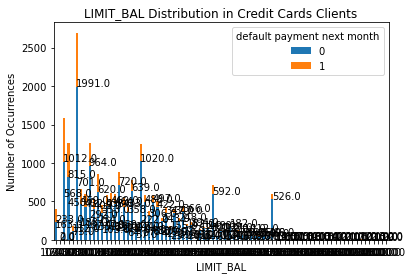

In [467]:
#plot value distribution of the highest ranked three categorical features, 
crosstb=pd.crosstab(df['LIMIT_BAL'], df['default payment next month'])
barplot = crosstb.plot(kind='bar', stacked=True, rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("LIMIT_BAL")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("LIMIT_BAL Distribution in Credit Cards Clients")


C:\Users\dmoye\AppData\Local\Temp\ipykernel_46792\3330924568.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'AGE Distribution in Credit Cards Clients')

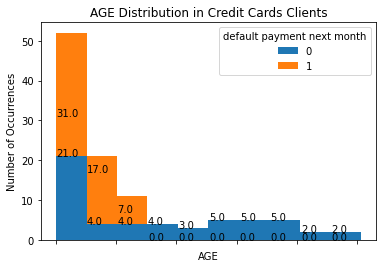

In [468]:
#PLOT value distribution of the lowest ranked three categorical features, 
crosstb=pd.crosstab(df['AGE'], df['default payment next month'])
barplot = crosstb.plot.hist(stacked='false',rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("AGE")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("AGE Distribution in Credit Cards Clients")


Text(0.5, 1.0, 'MARRIAGE Distribution in Credit Cards Clients')

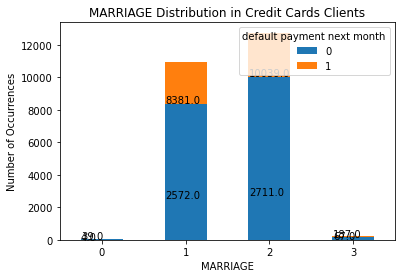

In [469]:
#PLOT value distribution of the lowest ranked three categorical features, 
crosstb=pd.crosstab(df['MARRIAGE'], df['default payment next month'])
barplot = crosstb.plot(kind='bar', stacked=True, rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("MARRIAGE")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("MARRIAGE Distribution in Credit Cards Clients")









Text(0.5, 1.0, 'SEX Distribution in Credit Cards Clients')

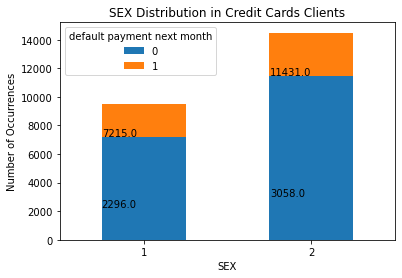

In [470]:
#PLOT value distribution of the lowest ranked three categorical features, 
crosstb=pd.crosstab(df['SEX'], df['default payment next month'])
barplot = crosstb.plot(kind='bar', stacked=True, rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("SEX")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("SEX Distribution in Credit Cards Clients")



Text(0.5, 1.0, 'EDUCATION Distribution in Credit Cards Clients')

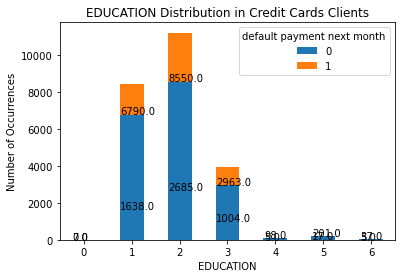

In [471]:
#PLOT value distribution of the lowest ranked three categorical features, 
crosstb=pd.crosstab(df['EDUCATION'], df['default payment next month'])
barplot = crosstb.plot(kind='bar', stacked=True, rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("EDUCATION")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("EDUCATION Distribution in Credit Cards Clients")


C:\Users\dmoye\AppData\Local\Temp\ipykernel_46792\1641948835.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'BILL_AMT1 Distribution in Credit Cards Clients')

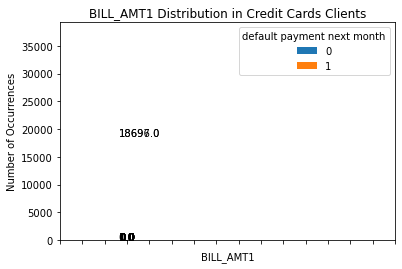

In [493]:
#PLOT value distribution of the highest ranked three numerical features

crosstb=pd.crosstab(df['BILL_AMT1'], df['default payment next month'])
barplot = crosstb.plot.hist(stacked=True, rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("BILL_AMT1")
x_ticks_array=[i for i in range(-155580, 746814, (746814-155580)//10)]
barplot.set_xticks(x_ticks_array)
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("BILL_AMT1 Distribution in Credit Cards Clients")

C:\Users\dmoye\AppData\Local\Temp\ipykernel_46792\3185865891.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'BILL_AMT2 Distribution in Credit Cards Clients')

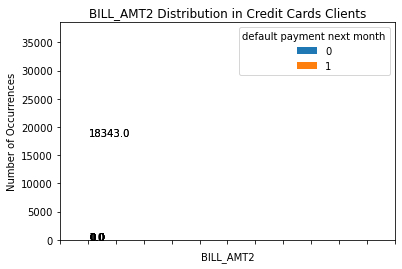

In [495]:
#PLOT value distribution of the highest ranked three numerical features
crosstb=pd.crosstab(df['BILL_AMT2'], df['default payment next month'])
barplot = crosstb.plot.hist(stacked=True, rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
barplot.set_xlabel("BILL_AMT2")
x_ticks_array=[i for i in range(-69777, 743970, (743970-69777)//10)]
barplot.set_xticks(x_ticks_array)
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("BILL_AMT2 Distribution in Credit Cards Clients")

C:\Users\dmoye\AppData\Local\Temp\ipykernel_46792\4232054661.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'BILL_AMT3 Distribution in Credit Cards Clients')

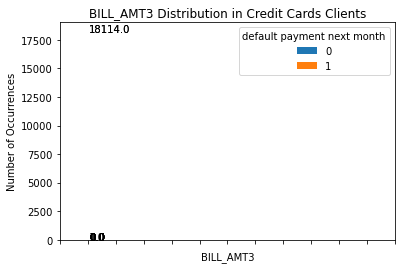

In [497]:
#PLOT value distribution of the highest ranked three numerical features
crosstb=pd.crosstab(df['BILL_AMT3'], df['default payment next month'])
barplot = crosstb.plot.hist( stacked=False, rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
x_ticks_array=[i for i in range(-157264, 1664089,(1664089-157264)//10)]
barplot.set_xticks(x_ticks_array)
barplot.set_xlabel("BILL_AMT3")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("BILL_AMT3 Distribution in Credit Cards Clients")

C:\Users\dmoye\AppData\Local\Temp\ipykernel_46792\4204546214.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'PAY_AMT5 Distribution in Credit Cards Clients')

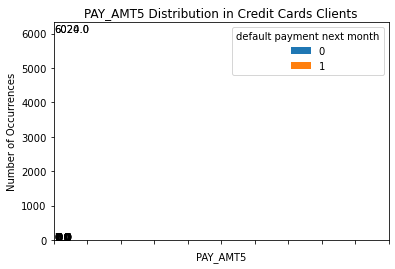

In [498]:
#PLOT value distribution of the lowest ranked three numerical features. 
crosstb=pd.crosstab(df['PAY_AMT5'], df['default payment next month'])
barplot = crosstb.plot.hist(stacked=False,rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
x_ticks_array=[i for i in range(0, 426529, (426529-0)//10)]
barplot.set_xticks(x_ticks_array)
barplot.set_xlabel("PAY_AMT5")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("PAY_AMT5 Distribution in Credit Cards Clients")

C:\Users\dmoye\AppData\Local\Temp\ipykernel_46792\192777321.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'AGE Distribution in Credit Cards Clients')

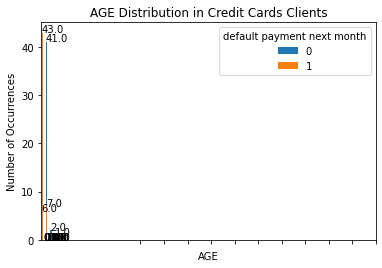

In [501]:
#PLOT value distribution of the lowest ranked three numerical features. 
crosstb=pd.crosstab(df['AGE'].value_counts(), df['default payment next month'])
barplot = crosstb.plot.hist(stacked=False,rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
x_ticks_array=[i for i in range(21, 75, (75-21)//10)]
barplot.set_xticks(x_ticks_array)
barplot.set_xlabel("AGE")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("AGE Distribution in Credit Cards Clients")


C:\Users\dmoye\AppData\Local\Temp\ipykernel_46792\797678729.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'PAY_AMT6 Distribution in Credit Cards Clients')

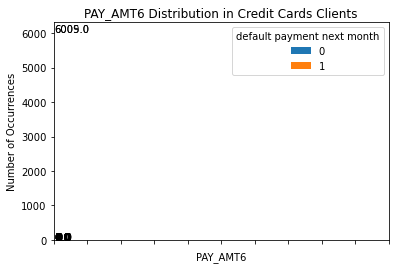

In [500]:
#PLOT value distribution of the lowest ranked three numerical features. 
crosstb=pd.crosstab(df['PAY_AMT6'], df['default payment next month'])
barplot = crosstb.plot.hist(stacked=False,rot=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()),(p.get_x()*1.005, p.get_height()*1.005))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=0)
x_ticks_array=[i for i in range(0, 528666, (528666-0)//10)]
barplot.set_xticks(x_ticks_array)
barplot.set_xlabel("PAY_AMT6")
barplot.set_ylabel("Number of Occurrences")
barplot.set_title("PAY_AMT6 Distribution in Credit Cards Clients")


In [502]:
#Describe what you observe from these value distributions and discuss whether the ranks are reasonable. 
'''
Before I rescaled the Histograms, they showed the data accordngly. However, once they reflected 10 intervals, the data becomes illegible in the graphs.

However, some of distributions were leftward/rightward/center where as the coloration trended toward certain sides depending on the graph. For example an attribute that leans rightward when values are distribnuted

Therefore, if the class attribute colors are clustered left or right along the value distributions, we can better predict which class attribute knowing how they responded based on their value distrution'''

'\nBefore I rescaled the Histograms, they showed the data accordngly. However, once they reflected 10 intervals, the data becomes illegible in the graphs.\n\nHowever, some of distributions were leftward/rightward/center where as the coloration trended toward certain sides depending on the graph. For example an attribute that leans rightward when values are distribnuted\n\nTherefore, if the class attribute colors are clustered left or right along the value distributions, we can better predict which class attribute knowing how they responded based on their value distrution'

In [512]:
'''TASK 4'''
#Please derive/generate at least one new feature from existing ones in the dataset and explain why you believe it is useful.
#Please add the feature or features you propose (those in Assignment 1 and the new ones) to the dataset
#in accordance with the following format: 
    #Column 1 is the client ID and Column 2-24 are the features in the original dataset. 
    #Insert your proposed feature in the subsequent columns, i.e., Column 25 and so on, 
    #and move the output class to the last column, e.g., Column 26 if you add only one new feature.
    
    #New Feature:
''' recluster AGE as intervals of 10:
        21=2
        35=3
        75=70
'''
#Explanation of why this feature is useful:
''' having clusters of ages enables us to see how age ranges correlate mutual informatoin wiht other attributes'''
    #Add new features to Column 26
AGE = df["AGE"]

cond_list = [AGE<20,AGE<30, AGE<40,AGE<50,AGE<60,AGE<70,AGE<80, AGE>=80]
choice_list = ["-1", "2", "3", "4","5","6","7","8"]

df['CLUSTER_AGE'] = np.select(cond_list, choice_list)   
df['CLUSTER_AGE']
    

0        3
1        2
2        3
3        3
4        5
        ..
23995    3
23996    3
23997    2
23998    3
23999    3
Name: CLUSTER_AGE, Length: 24000, dtype: object

In [556]:
for column in df[['AGE', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].columns:
    print(f'{column}:{[df[column].max()-df[column].min()]}')

AGE:[54]
BILL_AMT1:[912394]
BILL_AMT2:[813747]
BILL_AMT3:[1821353]
BILL_AMT4:[876864]
BILL_AMT5:[904874]
BILL_AMT6:[908995]
PAY_AMT1:[873552]
PAY_AMT2:[1684259]
PAY_AMT3:[889043]
PAY_AMT4:[621000]
PAY_AMT5:[426529]
PAY_AMT6:[528666]


In [547]:
#Normalize the range of values of numerical features (including the generated ones as appropriate) into [0, 1], 
#respectively. For each normalized numerical feature, show the ranges of both its original and normalized values. 
#In your report, please specify (or describe) the adopted normalization scheme.
#Normalize the range of values [0,1]
#show the range of both original and normalized values
#Specify Normalization Scheme:

#Normalized using maximum absolute scaling
df_num_scaled=df.copy()

for column in df_max_scaled[['AGE', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].columns:
    df_num_scaled[column] = df_num_scaled[column]  / df_num_scaled[column].abs().max()

df_num_scaled




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,5771,180000,1,2,1,0.506667,1,2,2,0,...,0.007174,0.006308,0.000000,0.002290,0.000119,0.000562,0.000200,0.000000,0.000000,1
1,3999,20000,2,1,2,0.306667,2,2,2,2,...,0.018330,0.015912,0.018207,0.004007,0.000119,0.001125,0.000805,0.000000,0.001892,1
2,397,100000,1,1,2,0.506667,0,0,0,0,...,0.060848,0.052227,0.041356,0.002864,0.000712,0.000967,0.000000,0.001357,0.000000,0
3,15467,220000,1,1,2,0.400000,2,0,0,0,...,0.128581,0.111582,0.134032,0.005724,0.002969,0.004724,0.006441,0.009378,0.009458,0
4,16482,240000,2,4,1,0.786667,0,0,0,0,...,0.341049,0.177818,0.189001,0.009567,0.005938,0.011248,0.016103,0.011723,0.037831,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,20939,280000,1,2,2,0.520000,-2,-2,-2,-2,...,0.005759,-0.000036,-0.000043,0.014398,0.002908,0.004697,0.000000,0.000000,0.000000,0
23996,4919,260000,2,1,2,0.520000,0,0,0,0,...,0.135776,0.076277,0.087466,0.034404,0.011909,0.005751,0.004895,0.046890,0.056760,0
23997,1437,80000,2,1,2,0.386667,0,0,0,2,...,0.113773,0.095058,0.110395,0.003253,0.012119,0.000000,0.004831,0.007034,0.005675,1
23998,1764,500000,1,1,2,0.440000,-1,-1,-1,-2,...,0.005882,0.009663,-0.000280,0.002364,0.006267,0.004690,0.012823,0.000460,0.013398,0


In [558]:
 #respectively. For each normalized numerical feature, show the ranges of both its original and normalized values. 
#In your report, please specify (or describe) the adopted normalization scheme.
#Normalize the range of values [0,1]
#show the range of both original and normalized values
#Specify Normalization Scheme:
for column in df_num_scaled[['AGE', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].columns:
    print(f'{column}:{[df_num_scaled[column].max()-df_num_scaled[column].min()]}')


AGE:[0.72]
BILL_AMT1:[1.2217151794154903]
BILL_AMT2:[1.0937900721803298]
BILL_AMT3:[1.0945045607536616]
BILL_AMT4:[1.240498879558161]
BILL_AMT5:[1.0987614444957137]
BILL_AMT6:[1.2986681791686192]
PAY_AMT1:[1.0]
PAY_AMT2:[1.0]
PAY_AMT3:[1.0]
PAY_AMT4:[1.0]
PAY_AMT5:[1.0]
PAY_AMT6:[1.0]


In [563]:
#Encode categorical features (including the generated ones as appropriate) using *one-hot representation* scheme. 
#For example, assuming that there is a ‘state’ feature with three categorical values, ’PA’, ‘NY’ and ‘NJ’. 
#Create three new binary features, namely ‘state_is_PA’, ‘state_is_NY’ and ‘state_is_NJ’ to replace 
#‘state’, where the feature values are either 0 or 1. 
#For each new binary feature, count and report the number of times value 1 occurs, e.g., “state_is_PA”: 15000, 
#“state_is_NY”: 20000 and “state_is_NJ”: 10000.
#Encode categorical features as one-hot (Including generated features)
#Three binary features:
#namely: ‘state_is_PA’, ‘state_is_NY’, ‘state_is_NJ’ to replace ‘state’ where feature is either 0 or 1
#For each binary feature, Count and report the number of times 1 occurs

nj=0
pa=0
ny=0
for ind in df.index:
    if ind%3==0: 
        df['state_is_NJ']=1
        df['state_is_PA']=0
        df['state_is_NY']=0
        nj+=1
    elif ind%3==1: 
        df['state_is_NJ']=0
        df['state_is_PA']=1
        df['state_is_NY']=0
        pa+=1
    elif ind%3==2: 
        df['state_is_NJ']=1
        df['state_is_PA']=0
        df['state_is_NY']=0
        ny+=1
df
print(f"pa:{pa} nj:{nj} ny:{ny}")

pa:8000 nj:8000 ny:8000


In [93]:
'''TASK 5'''
#In this task, you will train decision tree classifiers on the Credit Card Clients Dataset 
    #to predict whether a client will default in the next month.
#a) There are 14 numerical features and 9 categorical features.
#train **Decision Tree Model 1** based on normalized numerical features and one-hot encoded categorical features

'TASK 5'

In [94]:
#Train **Decision Tree Model 2** based on unnormalized numerical feature and one-hot encoded categorical feature.
#Feel free to train additional models if you would like to compare the effect of encoding on categorial features 
#(but please state your goal in the report).

In [98]:
#- [ ]  Please use 5-Fold cross-validation for experiments. 
#(See textbook and https://en.wikipedia.org/wiki/Cross-validation_(statistics)) 


In [99]:
##Please summarize the definitions and mathematical formulae of 
    #**confusion matrix, precision metric, recall metric, f-measure metric, and accuracy metric**.

In [100]:
#Please compare the performance of **Decision Tree Model 1** and **Decision Tree Model 2** in terms of these four metrics and give your conclusion.
#- Note: In your report, please specify (or describe) the adopted normalization scheme.

In [105]:
'''TASK 6'''
#Please list the reasons why we perform feature selection. 

In [102]:
#Please perform feature selection based on the correlation results in Task 3 
#(using chi-square for categorical data and mutual information for numerical data). 

In [103]:
#Generate partial datasets by only using top k (k =1, 3, 5)
#most correlated categorical features and numerical features for model training 
#(i.e., k categorical features + k numerical features). 

In [104]:
#Follow the setup in Task 5 to compare the performance of Decision Tree Models 
#trained using the partial datasets with the one using the original dataset 
#(i.e., without including features generated in Task 4(a)).  

<AxesSubplot:>

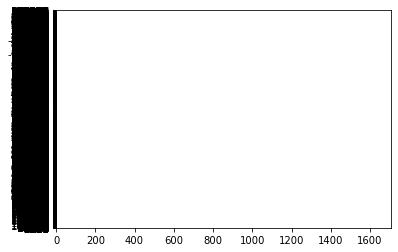